In [14]:
from utils import *

In [15]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
import os

os.environ['DISPLAY'] = 'localhost:11.0'
import matplotlib

matplotlib.use('TkAgg')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['PATH'] = '/home/gyzhang/cuda-8.0/bin:' + os.environ['PATH']
os.environ['LD_LIBRARY_PATH'] = '/home/gyzhang/cuda-8.0/lib64'
import tensorflow as tf

tf_graph = tf.get_default_graph()
_sess_config = tf.ConfigProto(allow_soft_placement=True)
_sess_config.gpu_options.allow_growth = True
sess = tf.Session(config=_sess_config, graph=tf_graph)
import keras.backend as K
K.set_session(sess)

from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
import time

tic = time.time()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
print('!!{}'.format(time.time() - tic))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')
seq.summary()

Using TensorFlow backend.


!!0.738749027252
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 40, 40, 40)  1153

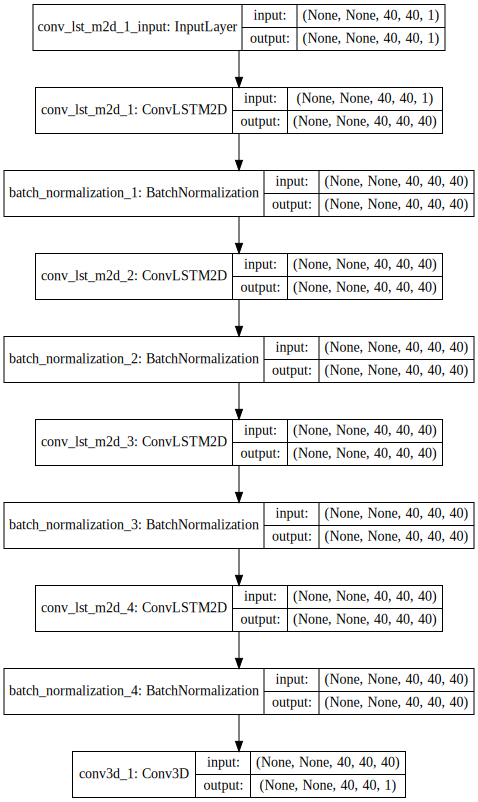

In [16]:
def i_vis_model(model):
    from keras.utils import vis_utils
    return SVG(vis_utils.model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
i_vis_model(seq)

In [17]:
t=tf.get_default_graph()
i_vis_graph(t.as_graph_def())

In [46]:
import tensorflow as tf
# tf_model_path='../tf_log/vgg11_cifar10/events.out.tfevents.1500381173.deepstation'
tf_model='../tfevents'
# from tensorflow.python.summary import summary_iterator
# for e in tf.train.summary_iterator(tf_model_path):
#       print(e)

In [47]:
from tensorflow.tensorboard.backend.event_processing import event_accumulator
# from tensorflow.tensorboard.backend.event_processing import *
from tensorflow.tensorboard.backend.event_processing import event_multiplexer

# ea = event_accumulator.EventAccumulator(tf_model_path,
#      size_guidance={ # see below regarding this argument
#      event_accumulator.COMPRESSED_HISTOGRAMS: 1,
#      event_accumulator.IMAGES: 4,
#      event_accumulator.AUDIO: 1,
#      event_accumulator.SCALARS: 0,
#      event_accumulator.HISTOGRAMS: 1,
#      })
# ea.Reload()
# ea.Tags()
# se=ea.Scalars('acc')[0]
# se

In [42]:
em = event_multiplexer.EventMultiplexer(size_guidance={
    event_accumulator.COMPRESSED_HISTOGRAMS: 1,
     event_accumulator.IMAGES: 4,
     event_accumulator.AUDIO: 1,
     event_accumulator.SCALARS: 0,
     event_accumulator.HISTOGRAMS: 1,
     event_accumulator.TENSORS:0
}).AddRunsFromDirectory(tf_model)

INFO:tensorflow:Event Multiplexer initializing.
INFO:tensorflow:Event Multiplexer done initializing
INFO:tensorflow:Starting AddRunsFromDirectory: ../tf_log
INFO:tensorflow:Adding events from directory ../tf_log/vgg11_cifar10
INFO:tensorflow:Constructing EventAccumulator for ../tf_log/vgg11_cifar10
INFO:tensorflow:Adding events from directory ../tf_log/tfevents/vgg11_cifar10
INFO:tensorflow:Constructing EventAccumulator for ../tf_log/tfevents/vgg11_cifar10
INFO:tensorflow:Done with AddRunsFromDirectory: ../tf_log


In [43]:
em.Reload()

INFO:tensorflow:Beginning EventMultiplexer.Reload()
INFO:tensorflow:Finished with EventMultiplexer.Reload()


In [44]:
[e.value for e in em.Scalars('vgg11_cifar10','acc')]
em.Scalars('vgg11_cifar10','acc')
em.Runs()

KeyError: 'vgg11_cifar10'

In [ ]:
tensors=em.Tensors('vgg11_cifar10','obs4/conv2d_out')
start_time=tensors[0].wall_time
for i in range(len(tensors)):
    print tensors[i].wall_time-start_time,tensors[i].step, tf.contrib.util.make_ndarray(tensors[i].tensor_proto).shape